In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt
import geopy as gpy

from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [2]:
filepath = "datasets_US_states(5m).json"

#data contains polygon shape coordinates for different map body types (continents, etc.)
map_df = gpd.read_file(filepath)
map_df.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [3]:
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

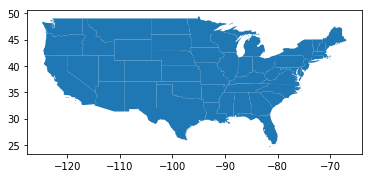

In [4]:
map48.plot()

In [5]:
filename = 'data_hurricaneIsaac2018.csv'
isaac_df = pd.read_csv(filename, sep=',')
isaac_df

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,09/07/2018 17:00,13.6,34.9,35,1007,Stationary,Tropical Depression,NINE,09/07/2018 16:45,Cangialosi
1,22,09/07/2018 17:00,35.8,92.3,10,1012,N at 7 MPH (360 deg),Tropical Depression,GORDON,09/07/2018 16:57,Hurley/otto
2,1...CORREC,09/07/2018 17:00,13.6,34.9,35,1007,Stationary,Tropical Depression,NINE,09/07/2018 16:59,Cangialosi
3,2,09/07/2018 23:00,13.9,34.9,35,1007,Stationary,Tropical Depression,NINE,09/07/2018 22:56,Roberts
4,23,09/07/2018 23:00,36.2,92.3,10,1012,NNE at 8 MPH (30 deg),Remnants,Gordon,09/07/2018 22:57,Hurley
5,3,09/08/2018 05:00,14.3,35.4,35,1007,WNW at 5 MPH (300 deg),Tropical Depression,NINE,09/08/2018 04:56,Stewart
6,4,09/08/2018 11:00,14.6,36.0,35,1007,WNW at 6 MPH (300 deg),Tropical Depression,NINE,09/08/2018 10:56,Beven
7,5,09/08/2018 17:00,14.5,36.6,40,1005,W at 7 MPH (275 deg),Tropical Storm,Isaac,09/08/2018 16:50,Beven
8,6,09/08/2018 23:00,14.4,37.5,50,1002,W at 8 MPH (270 deg),Tropical Storm,Isaac,09/08/2018 22:44,Cangialosi
9,7,09/09/2018 05:00,14.5,38.1,50,1001,W at 9 MPH (270 deg),Tropical Storm,Isaac,09/09/2018 04:41,Cangialosi


In [6]:
isaac_df['Long'] = 0 - isaac_df['Long']

In [7]:
isaac_df['coordinates'] = list(isaac_df[['Long', 'Lat']].values)

In [8]:
isaac_df['coordinates'] = isaac_df['coordinates'].apply(Point)

In [9]:
geo_isaac = gpd.GeoDataFrame(isaac_df, geometry='coordinates')

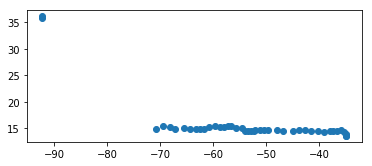

In [10]:
geo_isaac.plot()

Text(0.5, 1.0, 'Hurricane Isaac Path')

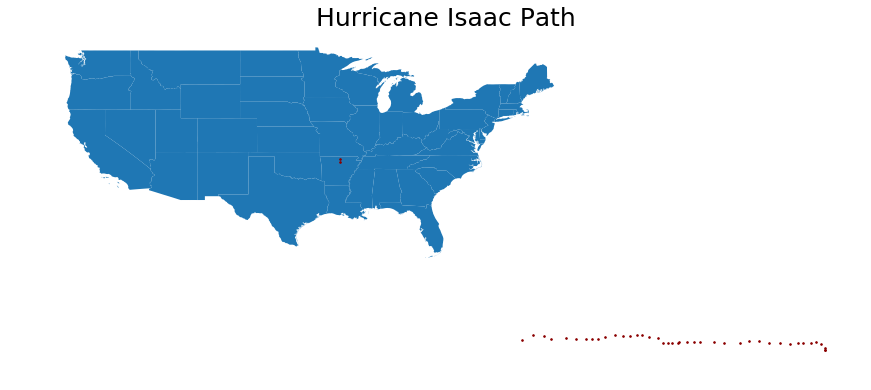

In [11]:
#plot coordinates on top of map graph

#this is to set the size of the borders
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48.plot(ax=ax)

#plot coordinates on top of map graph
geo_isaac.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Isaac Path", fontsize=25, fontweight=3)